In [15]:
import sys
sys.path.append('..')
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from metpy.plots import USCOUNTIES
import geopandas
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime, date
from dateutil import tz
import glob

from Map import Map

%matplotlib inline

In [16]:
LOCATION = 'south_carolina'

In [17]:
hazards = geopandas.read_file('data/current_hazards.shp')

In [18]:
# Set Coordinate Reference System for the map
map_crs = ccrs.Mercator()

# Set Coordinate Reference System from the Shapefile Data
data_crs = ccrs.PlateCarree()

In [19]:
# Set colors
warning_cmap = {'Flash Flood Watch': '#2E8B57',
                'Flood Watch': '#2E8B57',}

# Generate legend patches
legend_patches = []
for wwa in warning_cmap.keys():
   patch = mpatches.Patch(color=warning_cmap[wwa], label=wwa)
   legend_patches.append(patch)

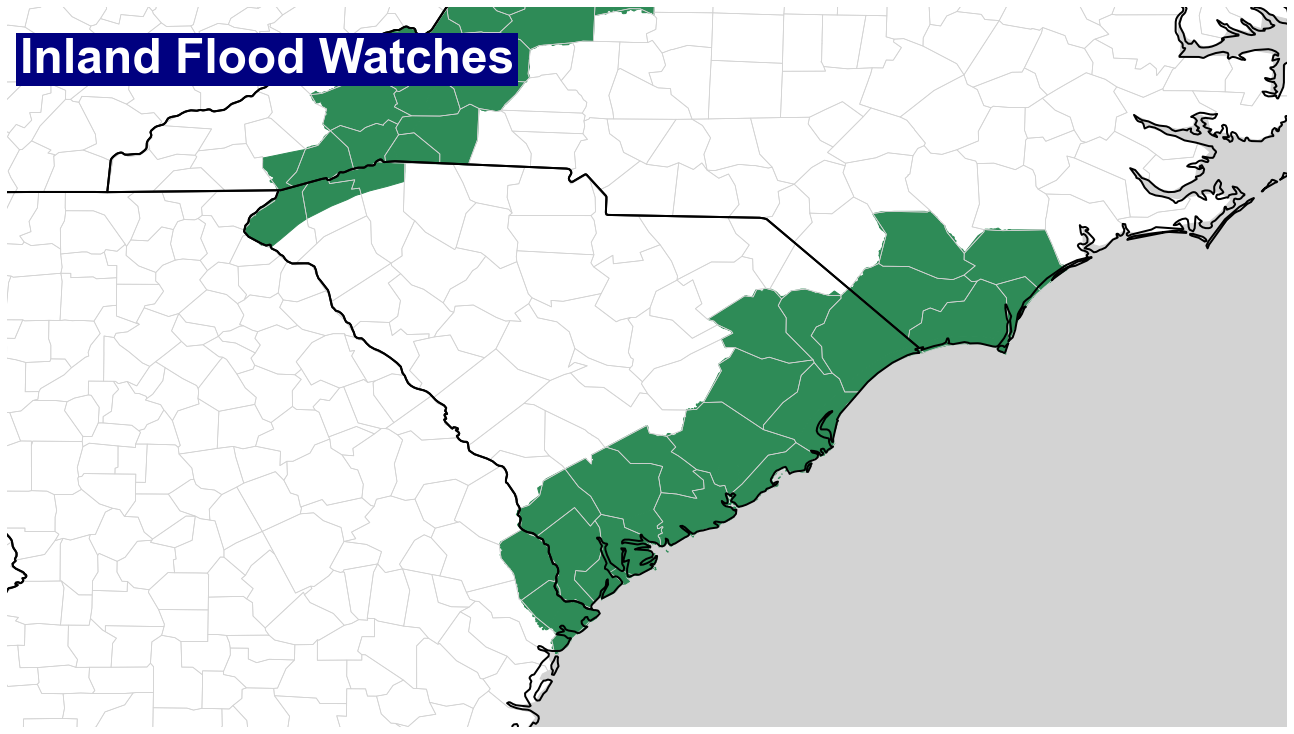

In [21]:
new_map = Map(LOCATION)
new_map.add_counties()
new_map.add_title(f'Inland Flood Watches')
fig, ax = new_map.make_map()

for key in warning_cmap.keys():
    geometries = hazards[hazards['PROD_TYPE'] == key]
    ax.add_geometries(geometries['geometry'], crs=data_crs, facecolor=warning_cmap[key],
                      edgecolor=warning_cmap[key], linewidth=1, zorder=1, alpha=1.0)

graphics_dir = Path('.') / '..' / '..' / 'graphics' / 'hazards'
fig.savefig(f'{graphics_dir}/flood_inland.png', dpi=72)